In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### First we will try to handle missing values

In [11]:
df['Age'].mean()

29.69911764705882

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### If we observe cabin Feature it doesnt give any usefull insight so we will drop this feature.

In [14]:
df.drop('Cabin',axis=1, inplace=True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [16]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
df['Embarked'].value_counts

<bound method IndexOpsMixin.value_counts of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

In [18]:
pd.Categorical(df['Embarked'])

['S', 'C', 'S', 'S', 'S', ..., 'S', 'S', 'S', 'C', 'Q']
Length: 891
Categories (3, object): ['C', 'Q', 'S']

In [19]:
df['Embarked'] = df['Embarked'].fillna('S')

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
df['Alone'] = df.Parch + df.SibSp

In [22]:
df['Alone'].loc[df['Alone']>0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Without Family'

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Without Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Without Family


In [24]:
pd.Categorical(df['Pclass'])

[3, 1, 3, 1, 3, ..., 2, 1, 3, 1, 3]
Length: 891
Categories (3, int64): [1, 2, 3]

In [25]:
pd.Categorical(df['Sex'])

['male', 'female', 'female', 'female', 'male', ..., 'male', 'female', 'female', 'male', 'male']
Length: 891
Categories (2, object): ['female', 'male']

In [26]:
person_dummies = pd.get_dummies(df['Sex'])
alone_dummies = pd.get_dummies(df['Alone'])
embarked_dummies = pd.get_dummies(df['Embarked'])

In [27]:
Main_df = pd.concat([df,person_dummies,alone_dummies,embarked_dummies],axis=1)

In [28]:
Main_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone,female,male,With Family,Without Family,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,With Family,0,1,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,With Family,1,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Without Family,1,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,With Family,1,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Without Family,0,1,0,1,0,0,1


In [29]:
Main_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Embarked'],axis=1,inplace=True)

In [30]:
Main_df.head()

,Survived,Pclass,Sex,Age,Fare,Alone,female,male,With Family,Without Family,C,Q,S
0,0,3,male,22.0,7.2500,With Family,0,1,1,0,0,0,1
1,1,1,female,38.0,71.2833,With Family,1,0,1,0,1,0,0
2,1,3,female,26.0,7.9250,Without Family,1,0,0,1,0,0,1
3,1,1,female,35.0,53.1000,With Family,1,0,1,0,0,0,1
4,0,3,male,35.0,8.0500,Without Family,0,1,0,1,0,0,1


In [31]:
Main_df.drop(['Sex','Alone'],axis=1,inplace=True)

In [32]:
Main_df.head()

,Survived,Pclass,Age,Fare,female,male,With Family,Without Family,C,Q,S
0,0,3,22.0,7.2500,0,1,1,0,0,0,1
1,1,1,38.0,71.2833,1,0,1,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,1,0,0,1
3,1,1,35.0,53.1000,1,0,1,0,0,0,1
4,0,3,35.0,8.0500,0,1,0,1,0,0,1


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

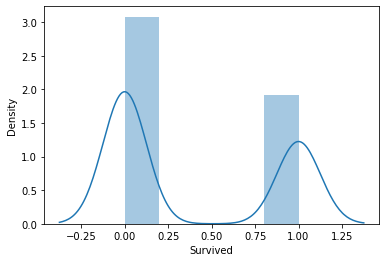

In [33]:
sns.distplot(Main_df['Survived'],kde=True)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

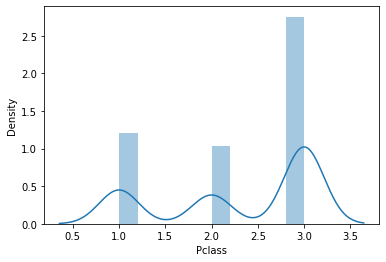

In [34]:
sns.distplot(Main_df['Pclass'],kde=True)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

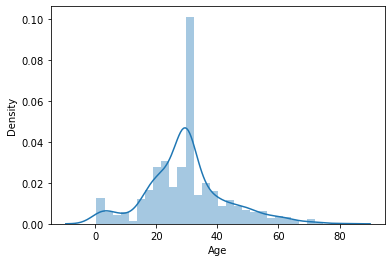

In [35]:
sns.distplot(Main_df['Age'],kde=True)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

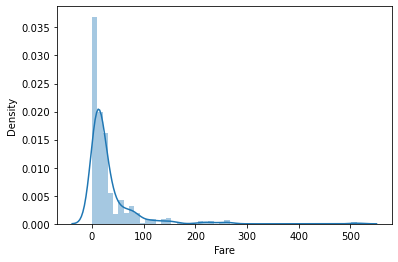

In [36]:
sns.distplot(Main_df['Fare'],kde=True)

### The distributions for all the features are fine..

### In the following model building we will be using Logistic regression and decision tree(Post Pruning)

In [37]:
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler 

In [38]:
X = Main_df.drop(columns = ['Survived'])
y = Main_df['Survived']

In [39]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [40]:
X_scaled

array([[ 0.82737724, -0.5924806 , -0.50244517, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.63878901,  0.78684529, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.2846632 , -0.48885426, ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724,  0.        , -0.17626324, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.2846632 , -0.04438104, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.17706291, -0.49237783, ..., -0.48204268,
         3.25137334, -1.62380254]])

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

### Logistic Regression

In [42]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred = log_reg.predict(x_test)

In [44]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7802690582959642

In [45]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[119,  26],
       [ 23,  55]], dtype=int64)

In [46]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [47]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8206896551724138

In [48]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8380281690140845

In [49]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8292682926829268

### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [51]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['Pclass',
 'Age',
 'Fare',
 'female',
 'male',
 'With Family',
 'Without Family',
 'C',
 'Q',
 'S']

[Text(313.8486328125, 528.5, 'X[4] <= -0.309\ngini = 0.478\nsamples = 668\nvalue = [404, 264]'),
 Text(120.498046875, 498.3, 'X[0] <= 0.229\ngini = 0.364\nsamples = 238\nvalue = [57, 181]'),
 Text(45.5625, 468.1, 'X[1] <= -2.093\ngini = 0.124\nsamples = 136\nvalue = [9, 127]'),
 Text(27.0, 437.9, 'X[2] <= 1.139\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(20.25, 407.70000000000005, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(33.75, 407.70000000000005, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(64.125, 437.9, 'X[2] <= -0.067\ngini = 0.112\nsamples = 134\nvalue = [8, 126]'),
 Text(47.25, 407.70000000000005, 'X[2] <= -0.08\ngini = 0.229\nsamples = 53\nvalue = [7, 46]'),
 Text(40.5, 377.5, 'X[1] <= 2.024\ngini = 0.204\nsamples = 52\nvalue = [6, 46]'),
 Text(27.0, 347.3, 'X[1] <= -0.554\ngini = 0.18\nsamples = 50\nvalue = [5, 45]'),
 Text(20.25, 317.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(33.75, 317.1, 'X[1] <= -0.169\ngini = 0.229\nsamples = 38\nvalue = [5,

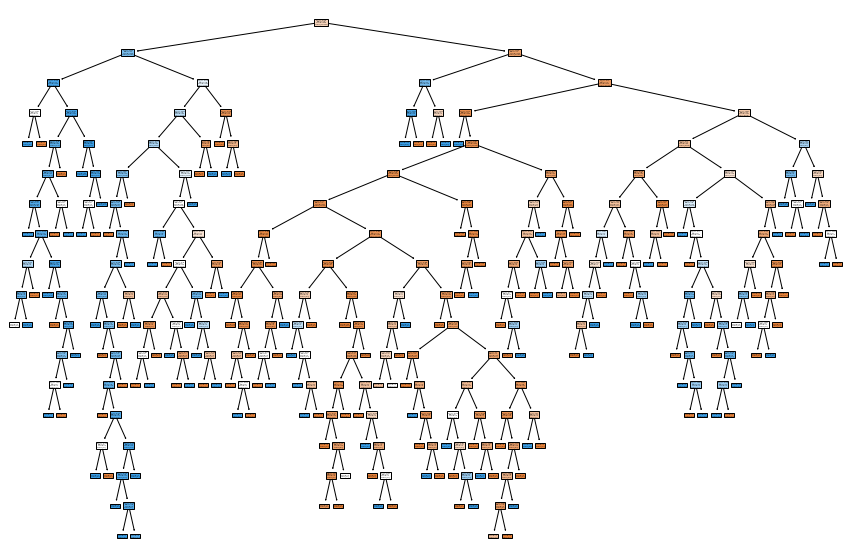

In [53]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [54]:
clf.score(x_train,y_train)

0.9865269461077845

In [55]:
dt_pred = clf.predict(x_test)

In [56]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.7174887892376681

### We can infer that our accuracy for the test data is less, So we will proceed with Hyperparameter optimization

In [57]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [58]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [59]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [60]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 8, 'splitter': 'random'}


In [61]:
grid_search.best_score_

0.8263045673886207

In [63]:
clf = DecisionTreeClassifier(criterion ='entropy',max_depth= 6, min_samples_leaf=7,min_samples_split=8,splitter='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=7,
                       min_samples_split=8, splitter='random')

In [64]:
clf.score(x_test,y_test)

0.7982062780269058

In [66]:
import pickle

with open(r'C:\Users\Dell\Documents\Notebook Files'+ '/modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)

In [67]:
y_score1 = clf.predict_proba(x_test)[:,1]
y_score2 = log_reg.predict_proba(x_test)[:,1]

In [68]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

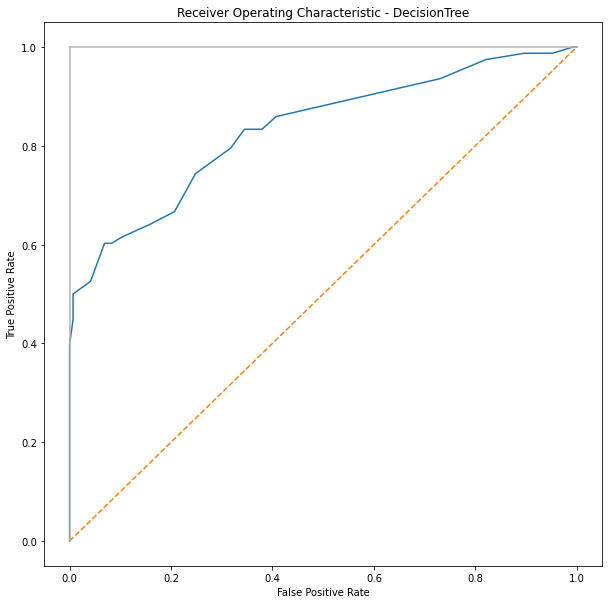

No handles with labels found to put in legend.


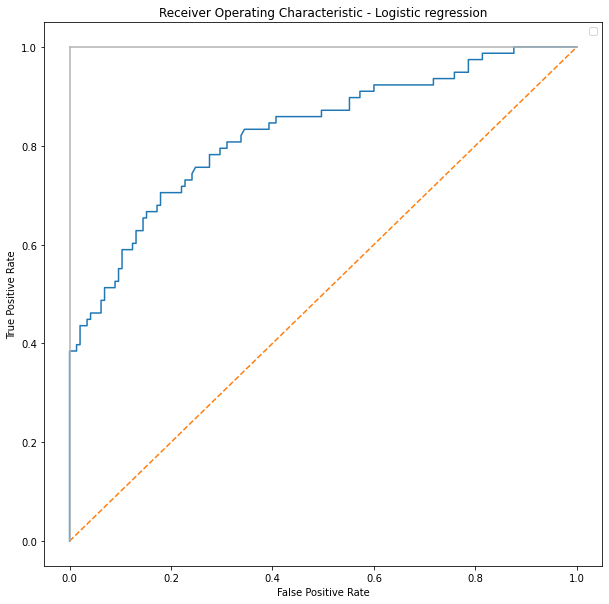

In [71]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

roc_auc_score for DecisionTree:  0.8334659593280282
roc_auc_score for Logistic Regression:  0.8275862068965517
